In [1]:
%matplotlib inline
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

In [2]:
def disk_structure(n):
    struct = np.zeros((2 * n + 1, 2 * n + 1))
    x, y = np.indices((2 * n + 1, 2 * n + 1))
    mask = (x - n)**2 + (y - n)**2 <= n**2
    struct[mask] = 1
    return struct.astype(np.bool)

def granulometry(data, sizes=None):
    s = max(data.shape)

    if sizes is None:
        sizes = range(1, s/2, 2)
   
    granulo = [ndimage.binary_opening(data, \
            structure=disk_structure(n)).sum() for n in sizes]
    return granulo

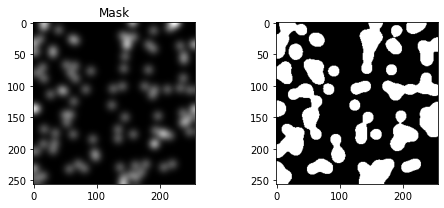

In [3]:
np.random.seed(1)
n = 10
l = 256

im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))

mask = im > im.mean()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].imshow(im, cmap=plt.cm.gray)
ax[0].set_title("Image")
ax[1].imshow(mask, cmap=plt.cm.gray)
ax[0].set_title("Mask")
plt.tight_layout()

In [4]:
granulo = granulometry(mask, sizes=np.arange(2, 19, 4))
print(granulo)

[23849, 23287, 14171, 4834, 0]


(256, 256) (256, 256)
14171


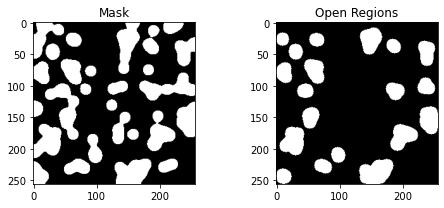

In [5]:
a_op = ndimage.binary_opening(mask, disk_structure(10))
print(mask.shape, a_op.shape)
print(a_op.sum())

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].imshow(mask, cmap=plt.cm.gray)
ax[0].set_title("Mask")
ax[1].imshow(a_op, cmap=plt.cm.gray)
ax[1].set_title("Open Regions")
plt.tight_layout()

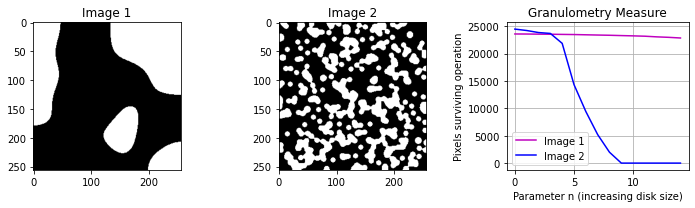

In [6]:
np.random.seed(1)
l = 256

n=8
im1 = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im1[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im1 = ndimage.gaussian_filter(im1, sigma=l/(1.*n))
mask1 = im1 > im1.mean()

n=20
im2 = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im2[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im2 = ndimage.gaussian_filter(im2, sigma=l/(4.*n))
mask2 = im2 > im2.mean()

maxn=15
P=np.zeros((maxn,2))
for n in range(maxn):
    a_op = ndimage.binary_opening(mask1, disk_structure(n))
    P[n,0]=a_op.sum()
    
for n in range(maxn):
    a_op = ndimage.binary_opening(mask2, disk_structure(n))
    P[n,1]=a_op.sum()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,3))
ax[0].imshow(mask1, cmap=plt.cm.gray)
ax[0].set_title("Image 1")
ax[1].imshow(mask2, cmap=plt.cm.gray)
ax[1].set_title("Image 2")
ax[2].plot(P[:,0],c="m", label="Image 1")
ax[2].grid(True)
ax[2].plot(P[:,1],c="b",label="Image 2")
ax[2].set_title("Granulometry Measure")
ax[2].set_ylabel("Pixels surviving operation")
ax[2].set_xlabel("Parameter n (increasing disk size)")
ax[2].legend()
plt.tight_layout()
plt.savefig("g.jpg")

In [7]:
print(np.mean(P, axis=0))

[23333.          9936.66666667]


In [8]:
print(disk_structure(5))

[[False False False False False  True False False False False False]
 [False False  True  True  True  True  True  True  True False False]
 [False  True  True  True  True  True  True  True  True  True False]
 [False  True  True  True  True  True  True  True  True  True False]
 [False  True  True  True  True  True  True  True  True  True False]
 [ True  True  True  True  True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True  True  True  True False]
 [False  True  True  True  True  True  True  True  True  True False]
 [False  True  True  True  True  True  True  True  True  True False]
 [False False  True  True  True  True  True  True  True False False]
 [False False False False False  True False False False False False]]
